In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Copied into overleaf table generator
# TODO: fix the issue with get_per: Our variances for effifacy are in [0,1] but they shouldn't be percentages!

In [3]:
# CSV is copied from Stata output
results_df = pd.read_csv('./results_post_strat.csv')
results_df

,result,point_estimate,standard_error,ci_low,ci_high
0,delete_aware,0.514140,0.038310,0.438683,0.589597
1,dislike_aware,0.939411,0.019807,0.900410,0.978412
2,not_int_aware,0.560274,0.033644,0.494021,0.626526
3,no_chan_aware,0.353651,0.029690,0.295181,0.412121
4,delete_aware__exp,0.523409,0.039967,0.444656,0.602161
5,dislike_aware__exp,0.938041,0.020110,0.898425,0.977656
6,not_int_aware__exp,0.571006,0.035360,0.501344,0.640668
7,no_chan_aware__exp,0.366213,0.032862,0.301470,0.430957
8,delete_use__exp_aware,0.536409,0.068204,0.401231,0.671587
9,dislike_use__exp_aware,0.377459,0.040069,0.298501,0.456417


In [4]:
sample_size = pd.read_csv('./survey_sample_size.csv', index_col=0)
sample_size

,n
delete_aware,248
delete_aware__exp,229
delete_use__exp_aware,110
delete_eff__exp_aware,104
delete_eff__exp_aware_use,48
delete_eff__exp_aware_no_use,56
dislike_aware,263
dislike_aware__exp,241
dislike_use__exp_aware,226
dislike_eff__exp_aware,210


In [5]:
results_df = results_df.join(sample_size, on='result')

In [6]:
def get_str(s, l=results_df.shape[0]):
    return pd.Series([s for i in range(l)])

In [7]:
# should be a number 
# if less than 1 it's a ratio so turn it into percentage
# else just return the shortened number
def get_per(series):
    return series.apply(
        lambda x: '{0:.2f}\%'.format(x*100) if x<=1 else '{0:.2f}'.format(x)
    ).astype('str')



In [8]:
results_df.dtypes

result             object
point_estimate    float64
standard_error    float64
ci_low            float64
ci_high           float64
n                   int64
dtype: object

In [9]:
results_df

,result,point_estimate,standard_error,ci_low,ci_high,n
0,delete_aware,0.514140,0.038310,0.438683,0.589597,248
1,dislike_aware,0.939411,0.019807,0.900410,0.978412,263
2,not_int_aware,0.560274,0.033644,0.494021,0.626526,258
3,no_chan_aware,0.353651,0.029690,0.295181,0.412121,255
4,delete_aware__exp,0.523409,0.039967,0.444656,0.602161,229
5,dislike_aware__exp,0.938041,0.020110,0.898425,0.977656,241
6,not_int_aware__exp,0.571006,0.035360,0.501344,0.640668,237
7,no_chan_aware__exp,0.366213,0.032862,0.301470,0.430957,235
8,delete_use__exp_aware,0.536409,0.068204,0.401231,0.671587,110
9,dislike_use__exp_aware,0.377459,0.040069,0.298501,0.456417,226


In [10]:
results_df['var'] = (results_df['ci_high'] - results_df['ci_low']) / 2

In [11]:
results_df['ci'] = (
    get_str('(') 
    + get_per(results_df['ci_low']) 
    + get_str(',') 
    + get_per(results_df['ci_high']) 
    + get_str(')')
)

In [12]:
results_df['estimate'] = (get_per(results_df['point_estimate'])
                         +get_str('$\pm$') # for latex to read the plus/minus symbol (works on notebooks too!!)
                         +get_per(results_df['var'])
                         +get_str(' [')
                         +results_df['n'].astype('str')
                         +get_str(']'))

In [13]:
results_df

,result,point_estimate,standard_error,ci_low,ci_high,n,var,ci,estimate
0,delete_aware,0.514140,0.038310,0.438683,0.589597,248,0.075457,"(43.87\%,58.96\%)",51.41\%$\pm$7.55\% [248]
1,dislike_aware,0.939411,0.019807,0.900410,0.978412,263,0.039001,"(90.04\%,97.84\%)",93.94\%$\pm$3.90\% [263]
2,not_int_aware,0.560274,0.033644,0.494021,0.626526,258,0.066252,"(49.40\%,62.65\%)",56.03\%$\pm$6.63\% [258]
3,no_chan_aware,0.353651,0.029690,0.295181,0.412121,255,0.058470,"(29.52\%,41.21\%)",35.37\%$\pm$5.85\% [255]
4,delete_aware__exp,0.523409,0.039967,0.444656,0.602161,229,0.078753,"(44.47\%,60.22\%)",52.34\%$\pm$7.88\% [229]
5,dislike_aware__exp,0.938041,0.020110,0.898425,0.977656,241,0.039615,"(89.84\%,97.77\%)",93.80\%$\pm$3.96\% [241]
6,not_int_aware__exp,0.571006,0.035360,0.501344,0.640668,237,0.069662,"(50.13\%,64.07\%)",57.10\%$\pm$6.97\% [237]
7,no_chan_aware__exp,0.366213,0.032862,0.301470,0.430957,235,0.064744,"(30.15\%,43.10\%)",36.62\%$\pm$6.47\% [235]
8,delete_use__exp_aware,0.536409,0.068204,0.401231,0.671587,110,0.135178,"(40.12\%,67.16\%)",53.64\%$\pm$13.52\% [110]
9,dislike_use__exp_aware,0.377459,0.040069,0.298501,0.456417,226,0.078958,"(29.85\%,45.64\%)",37.75\%$\pm$7.90\% [226]


In [14]:
buttons = ['delete','dislike','not_int','no_chan']
results = ['aware','aware__exp','use__exp_aware','eff__exp_aware','eff__exp_aware_use','eff__exp_aware_no_use']

mi = pd.MultiIndex.from_product(
    [results,buttons],names=['metric','strategy']
)
results_df.set_index(mi,inplace=True)

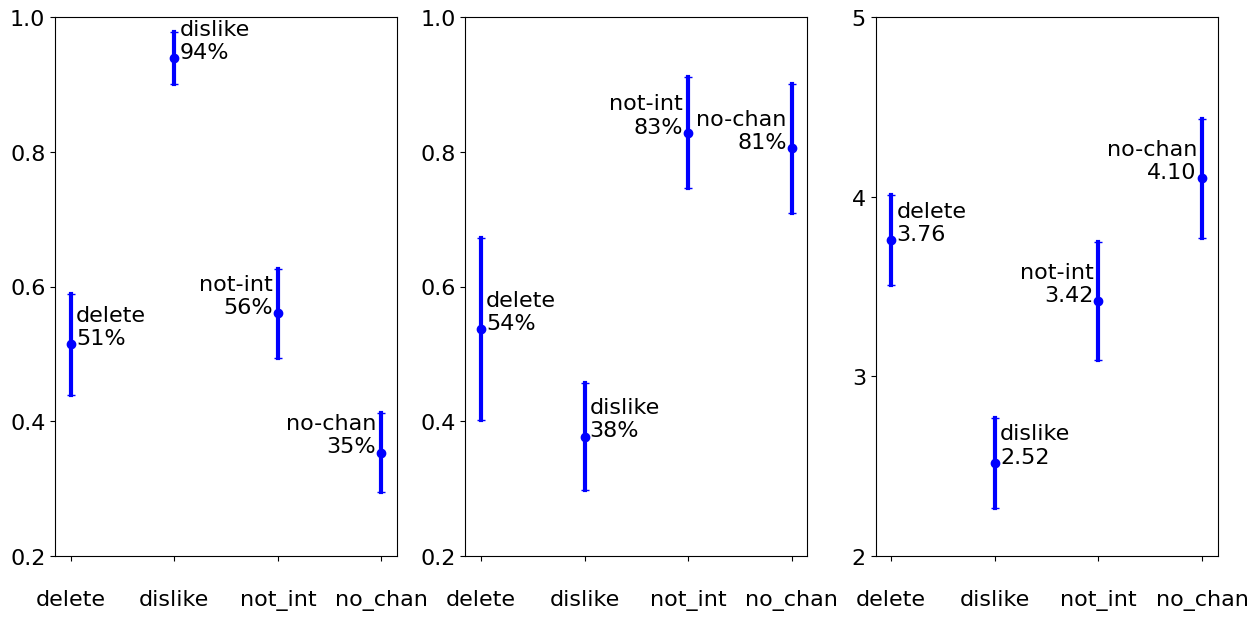

In [15]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1,3,figsize=(15,7))

displayed_constructs = ['aware','use__exp_aware','eff__exp_aware_use']
for i in range(len(displayed_constructs)):
    construct = displayed_constructs[i]
    ax = axs[i]
    dataset = results_df[['ci_low','ci_high']].loc[(construct,slice(None))]
    for lower,upper,x in zip(dataset['ci_low'],dataset['ci_high'],range(len(dataset))):
        ax.plot((x,x),(lower,upper),'_-',color='blue',linewidth=3)
        ax.plot(x, (lower+upper)/2, marker="o", markersize=6, markeredgecolor="blue", markerfacecolor="blue")
        point_est = (lower+upper)/2
        if i < 2:
            text='{0}\n{1:.0f}%'.format(dataset.index[x].replace('_','-'),point_est*100)
        else:
            text='{0}\n{1:.2f}'.format(dataset.index[x].replace('_','-'),point_est)
        if x<=1:
            ax.text(x+.05, point_est, text, horizontalalignment='left')
        else:
            ax.text(x-.05, point_est, text, horizontalalignment='right')
    
    #ax.set_title(construct)
    ax.set_xticks(range(len(dataset)),['\n'+x for x in list(dataset.index)])
    if i<2:
        ax.set_ylim([.2,1])
        ax.set_yticks(np.arange(.2,1.1,.2)) 
    else:
        ax.set_ylim([2,5])
        ax.set_yticks(np.arange(2,5.1,1))


In [16]:
final_display_df = results_df['estimate'].unstack().T.loc[buttons,results]
# aware% = #aware / #participants
# use_exp_aware% = #use / (#participants who've experienced and are aware)
final_display_df

metric,aware,aware__exp,use__exp_aware,eff__exp_aware,eff__exp_aware_use,eff__exp_aware_no_use
strategy,,,,,,
delete,51.41\%$\pm$7.55\% [248],52.34\%$\pm$7.88\% [229],53.64\%$\pm$13.52\% [110],3.46$\pm$23.70\% [104],3.76$\pm$25.02\% [48],3.08$\pm$26.23\% [56]
dislike,93.94\%$\pm$3.90\% [263],93.80\%$\pm$3.96\% [241],37.75\%$\pm$7.90\% [226],2.46$\pm$20.79\% [210],2.52$\pm$25.02\% [62],2.28$\pm$21.93\% [148]
not_int,56.03\%$\pm$6.63\% [258],57.10\%$\pm$6.97\% [237],82.83\%$\pm$8.23\% [156],3.35$\pm$35.17\% [145],3.42$\pm$32.86\% [122],3.33$\pm$52.75\% [23]
no_chan,35.37\%$\pm$5.85\% [255],36.62\%$\pm$6.47\% [235],80.53\%$\pm$9.58\% [111],3.99$\pm$32.79\% [109],4.10$\pm$33.18\% [88],3.47$\pm$32.44\% [21]


In [17]:
# [1/13] Results within 2% if filtering from aware to aware given experience

In [18]:
# Display relevant columns for paper
final_display_df[[
    'aware',
    'use__exp_aware',
    'eff__exp_aware_use'
]].to_csv('./final_results_post_strat.csv')